<a href="https://colab.research.google.com/github/IagoArj/SiteOverest/blob/master/termica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

3.4.3


Text(0.5,1,'imagem termica')

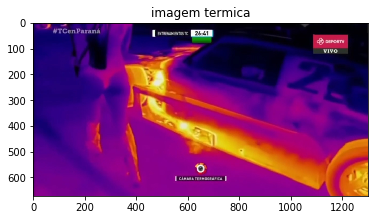

In [3]:
image = cv2.imread("termica.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("imagem termica")

Text(0.5,1,'k=5')

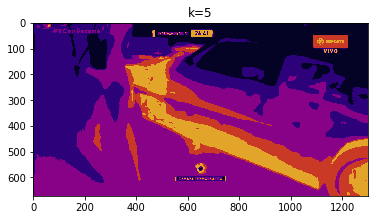

In [4]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)
plt.title("k=" + str(k))

In [5]:

height, width = segmented_image.shape[:2]

k0=0
k1=0
k2=0
k3=0
k4=0

p0=0
p1=0
p2=0
p3=0
p4=0
j=0
c=0
for x in range (0,width):
  for y in range(0,height):
    j=j+1
    color = str(segmented_image[y,x])
    if color == k0:
      p0=p0+1
    elif color == k1:
      p1=p1+1
    elif color == k2:
      p2=p2+1
    elif color == k3:
      p3=p3+1
    elif color == k4:
      p4=p4+1
    else:
      if c == 0:
        c=c+1
        k0=color
        p0=p0+1
      elif c==1:
        c=c+1
        k1=color
        p1=p1+1
      elif c==2:
        c=c+1
        k2=color
        p2=p2+1
      elif c ==3:
        c=c+3
        k3=color
        p3=p3+1
      elif c>3:
        k4=color
        p4=p4+1
total = p0+p1+p2+p3+p4
print('Total de pixels:',total)
print("cor:" , k0 ,"Quantidade: ", p0 )
print("cor:" , k1 ,"Quantidade: ", p1 )
print("cor:" , k2 ,"Quantidade: ", p2 )
print("cor:" , k3 ,"Quantidade: ", p3 )    
print("cor:" , k4 ,"Quantidade: ", p4 )

('Total de pixels:', 874272)
('cor:', '[ 5  3 37]', 'Quantidade: ', 149312)
('cor:', '[ 45   1 121]', 'Quantidade: ', 218334)
('cor:', '[135   2 134]', 'Quantidade: ', 337247)
('cor:', '[202  57  37]', 'Quantidade: ', 97094)
('cor:', '[227 164  42]', 'Quantidade: ', 72285)


In [11]:
t0= input("Temperatura 01: ")
t1= input("Temperatura 02: ")
t2= input("Temperatura 03: ")
t3= input("Temperatura 04: ")
t4= input("Temperatura 05: ")
tempMedia = ((p0*t0)+(p1*t1)+(p2*t2)+(p3*t3)+(p4*t4))/total
print("Temperatura Media: " ,tempMedia)


KeyboardInterrupt: ignored

('Temperatura Media: ', 36)
